In [102]:
#Installing the libraries to use for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datasist


In [103]:
#loading the dataset into the IDE and saving it as df using pandas
df=pd.read_csv("C:\\Users\\abegu\\Downloads\\TSLA.csv")

In [104]:
#check if there are missing values
df.isna()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
3069,False,False,False,False,False,False,False
3070,False,False,False,False,False,False,False
3071,False,False,False,False,False,False,False
3072,False,False,False,False,False,False,False


In [106]:
#having a look at the first five rows of the data to have an insight into what it looks like
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-08-02,1.366667,1.398000,1.355333,1.394667,1.394667,10771500
1,2010-08-03,1.400000,1.463333,1.388000,1.463333,1.463333,18457500
2,2010-08-04,1.463333,1.478667,1.390000,1.417333,1.417333,13695000
3,2010-08-05,1.436000,1.436667,1.336667,1.363333,1.363333,11943000
4,2010-08-06,1.340000,1.344000,1.301333,1.306000,1.306000,11128500


In [107]:
#converting date into year
df['year'] = pd.DatetimeIndex(df['Date']).year

In [108]:
#using the iloc function to remove date from the vvariables since we have converted date to year
df2=df.iloc[:,1:8]

In [110]:
#exploratory data analysis is an approach to data analysis which seeks to summarize main characteristics. The first five summary is a major part of exploratory data anlaysis. 
df2.describe()

,Open,High,Low,Close,Adj Close,Volume,year
count,3074.000000,3074.000000,3074.000000,3074.000000,3074.000000,3.074000e+03,3074.000000
mean,57.141219,58.417855,55.749331,57.111818,57.111818,9.355913e+07,2016.180547
std,95.205846,97.392028,92.757684,95.096159,95.096159,8.221465e+07,3.543179
min,1.186667,1.193333,1.159333,1.173333,1.173333,1.777500e+06,2010.000000
25%,9.096167,9.363333,8.858333,9.161333,9.161333,4.204950e+07,2013.000000
50%,16.135333,16.394668,15.811000,16.137000,16.137000,7.554450e+07,2016.000000
75%,23.798501,24.240500,23.437833,23.784167,23.784167,1.172816e+08,2019.000000
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08,2022.000000


array([[<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>,
        <AxesSubplot:title={'center':'Low'}>],
       [<AxesSubplot:title={'center':'Close'}>,
        <AxesSubplot:title={'center':'Adj Close'}>,
        <AxesSubplot:title={'center':'Volume'}>],
       [<AxesSubplot:title={'center':'year'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

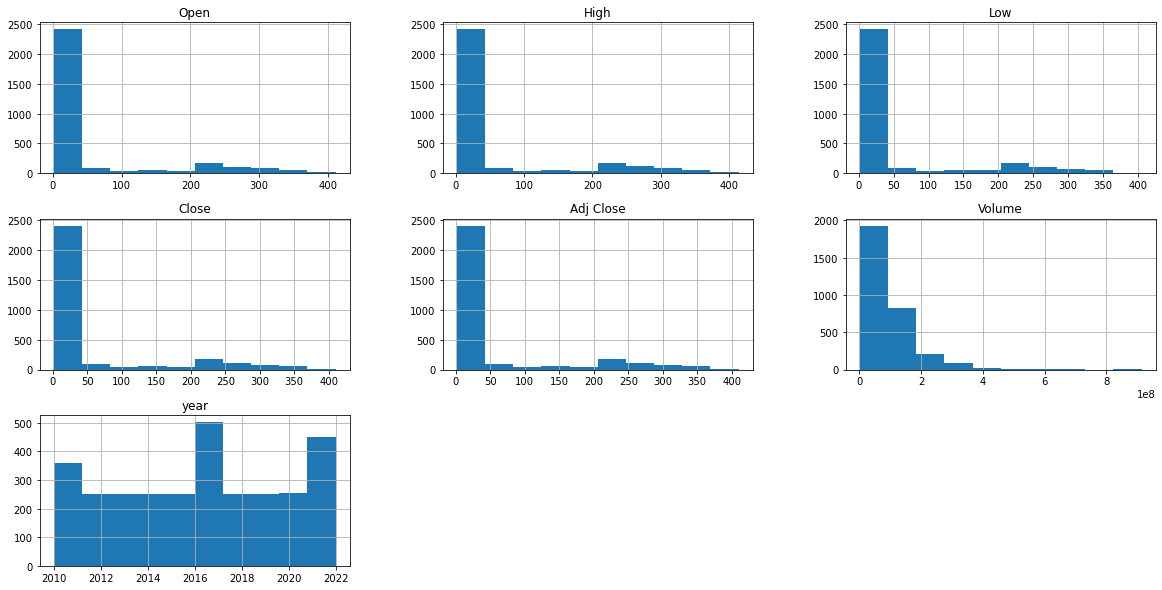

In [111]:
#data visualization using a histogram
df2.hist(figsize=(20,10))

In [ ]:
#feature engineering
#Feature engineering is the process of using domain knowledge to select and transform features from raw data before building a predictive model using machine learning
#feature engineering helps with handling missing data, creating new features, one hot encoding, and selecting features for modelling. It also helps to get the best result from an algorithm. 

In [112]:
#to check the correlation between variables 
df2.corr()

,Open,High,Low,Close,Adj Close,Volume,year
Open,1.000000,0.999733,0.999607,0.999220,0.999220,0.056984,0.714252
High,0.999733,1.000000,0.999612,0.999645,0.999645,0.060516,0.714423
Low,0.999607,0.999612,1.000000,0.999683,0.999683,0.053435,0.714344
Close,0.999220,0.999645,0.999683,1.000000,1.000000,0.057758,0.714403
Adj Close,0.999220,0.999645,0.999683,1.000000,1.000000,0.057758,0.714403
Volume,0.056984,0.060516,0.053435,0.057758,0.057758,1.000000,0.394567
year,0.714252,0.714423,0.714344,0.714403,0.714403,0.394567,1.000000


In [113]:
#modelling
df2.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'year'], dtype='object')

In [114]:
#separating the variables into X and y which are the independent and the dependent variable
X=df2.drop('Open',axis=1)
y=df2.Open

In [115]:
#importing the library to split the variable into train and test set
from sklearn.model_selection import train_test_split

In [116]:
#splitting the variable into train and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [117]:
#importing the library for the prediction algorithm
from sklearn.ensemble import RandomForestRegressor

In [118]:
#fitting the model into the algorithm
model=RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [119]:
predictions=model.predict(X_test)

In [120]:
random_forest = pd.DataFrame({'Actual value': y_test, 'Predicted value': predictions})
random_forest.head()

,Actual value,Predicted value
2698,234.923340,239.605700
2045,19.250668,19.436613
2530,124.333336,126.444187
194,1.800000,1.825140
240,1.902000,1.900460


In [121]:
from sklearn import metrics
import numpy as np
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

RMSE: 2.247343947607412


In [33]:
import pickle

In [34]:
file=open('random_forest_model.pkl','wb')
pickle.dump(model,file)

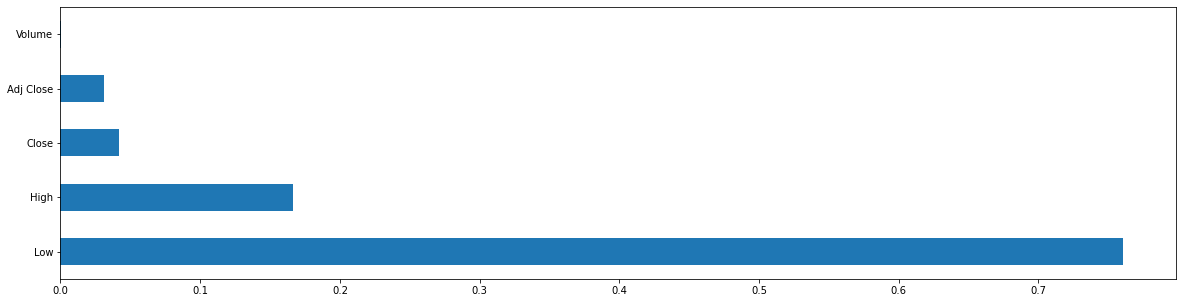

In [123]:
feat_importances=pd.Series(model.feature_importances_,index=X_train.columns)
feat_importances.nlargest(5).plot(kind='barh',figsize=(20,5))
plt.show()

In [ ]:
#findings
#from the visualization above, it cdan be seen that close, Adj Close, High, Low are good predictors in the model and they have influence on it. 